<a href="https://colab.research.google.com/github/u1610021/MC_PROJECT__U1610021/blob/master/mc_project_face_mask_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

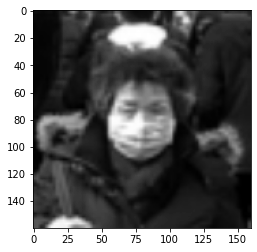

In [444]:
DATADIR="/content/faces"
CATEGORIES=["mask","no_mask"]

for category in CATEGORIES:
  path = os.path.join(DATADIR,category) #path to mask and no mask folder
  for img in os.listdir(path):
    img_array =cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break

In [445]:
print(img_array.shape)

(160, 160)


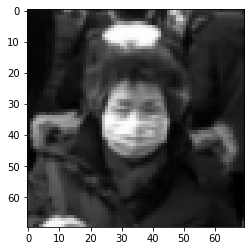

In [446]:
IMG_SIZE=70

new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [0]:
training_data=[]

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR,category) #path to mask and no mask folder
    class_num=CATEGORIES.index(category) #giving index number for mask and no_mask
    for img in os.listdir(path):
      try: 
        img_array =cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass

create_training_data()
         

In [448]:
print(len(training_data))


2627


In [0]:
import random

random.shuffle(training_data)

In [450]:
for sample in training_data[:10]:
  print(sample[1])

1
0
1
0
1
1
1
1
1
1


In [0]:
X=[]  #features
y=[]  #labels

In [0]:
for features,label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
  


In [453]:
X = X/255.0
y=np.array(y)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 68, 68, 32)        320       
_________________________________________________________________
activation_75 (Activation)   (None, 68, 68, 32)        0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_76 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 16384)           

In [454]:
history=model.fit(X, y, batch_size=32, epochs=3, validation_split=0.1)
model.save('mask_no_mask.model')


Epoch 1/3
74/74 [==============================] - 13s 174ms/step - loss: 0.5690 - accuracy: 0.7217 - val_loss: 0.3037 - val_accuracy: 0.9011
Epoch 2/3
74/74 [==============================] - 13s 173ms/step - loss: 0.2398 - accuracy: 0.9091 - val_loss: 0.2596 - val_accuracy: 0.8935
Epoch 3/3
74/74 [==============================] - 13s 174ms/step - loss: 0.1731 - accuracy: 0.9365 - val_loss: 0.1957 - val_accuracy: 0.9316
INFO:tensorflow:Assets written to: mask_no_mask.model/assets


In [455]:
# TODO: Evaluate model on test data
score = model.evaluate(X, y, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.11634361743927002
Test accuracy: 0.9619337916374207


Text(0.5, 0, 'epoch')

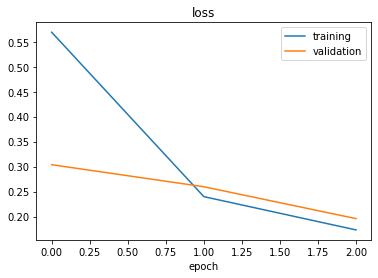

In [456]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

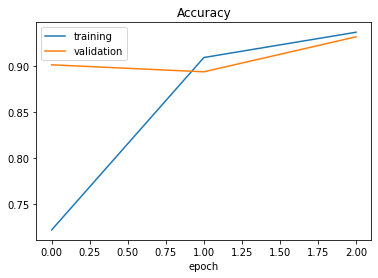

In [457]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [0]:
def prepare(filepath):
    IMG_SIZE = 70  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.


In [461]:
model = tf.keras.models.load_model("mask_no_mask.model")
prediction = model.predict([prepare('/content/image/allmade-allmask-facemask-jade.jpg')])
print(CATEGORIES[int(prediction[0][0])])

mask
